In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import pandas_datareader as pdr

import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Correlation between rate hikes and crypto prices

1. Get the fed interest rate data for period P
2. Get the crypto price data (proxy as BTC price or total market cap) for period P
3. Check correlation coefficients for data

# Interest rate data

In [13]:
rate_data = os.path.join("..", "data", "FRB_H15.csv")

In [14]:
df_rates = pd.read_csv(rate_data, skiprows=5)
df_rates['Time Period']= pd.to_datetime(df_rates['Time Period'])
df_rates.set_index("Time Period", inplace=True)

In [ ]:
df_rates = df_rates.loc["2017":"2018"]

In [ ]:
df_rates["RIFLGFCY10_N.B"].loc[df_rates["RIFLGFCY10_N.B"] == "ND"] = np.NaN
df_rates["RIFLGFCY10_N.B"] = df_rates["RIFLGFCY10_N.B"].astype("float32")

In [ ]:
df_rates["RIFLGFCY02_N.B"].loc[df_rates["RIFLGFCY02_N.B"] == "ND"] = np.NaN
df_rates["RIFLGFCY02_N.B"] = df_rates["RIFLGFCY02_N.B"].astype("float32")

# Get BTC-USD price

In [6]:
start_date = datetime.strptime("2017-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2022-04-30", "%Y-%m-%d")

In [7]:
btc_data = pdr.get_data_yahoo(['BTC-USD'], start=start_date, end=end_date)

# Plot result

In [ ]:
btc_data = btc_data.loc["2017":"2018"]

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_scatter(
    x=btc_data.index,
    y=btc_data["Adj Close"]["BTC-USD"],
    mode="markers",
    name="BTC-USD price",
    secondary_y=False,
)

fig.add_scatter(
    x=df_rates.index,
    y=df_rates["RIFLGFCY02_N.B"],
    mode="markers",
    name="Two year yield",
    secondary_y=True,
)

fig.add_scatter(
    x=df_rates.index,
    y=df_rates["RIFLGFCY10_N.B"],
    mode="markers",
    name="Ten year yield",
    secondary_y=True,
)

rate_2y = np.interp(btc_data.index, df_rates.index, df_rates["RIFLGFCY02_N.B"])

fig.add_scatter(
    x=btc_data.index,
    y=rate_2y,
    mode="lines",
    name="Two year yield interpolant",
    secondary_y=True,
)

In [ ]:
fig = go.Figure()

fig.add_scatter(
    x=rate_2y,
    y=btc_data["Adj Close"]["BTC-USD"],
    mode="markers",
    name="BTC-USD price vs 2Y rate",
)

fig.update_layout(
    autosize=False,
    width=800,
    height=800
)

## Correlation matrix

In [ ]:
df_corr = pd.DataFrame(columns=["Date", "Price", "TwoYearRate"])

In [ ]:
df_corr.Date = btc_data.index
df_corr = df_corr.set_index("Date")

df_corr.Price = btc_data["Adj Close"]["BTC-USD"]
df_corr.TwoYearRate = rate_2y

In [ ]:
df_corr[:"2017"].corr()

In [ ]:
df_corr["2018":].corr()

# Overall comparison

In [21]:
df_rates["RIFLGFCY02_N.B"]

Time Period
2017-01-02      ND
2017-01-03    1.22
2017-01-04    1.24
2017-01-05    1.17
2017-01-06    1.22
              ... 
2022-04-22    2.72
2022-04-25    2.63
2022-04-26    2.54
2022-04-27    2.58
2022-04-28    2.63
Name: RIFLGFCY02_N.B, Length: 1389, dtype: object

In [22]:
df_rates = df_rates.loc["2017":]

In [23]:
df_rates["RIFLGFCY10_N.B"].loc[df_rates["RIFLGFCY10_N.B"] == "ND"] = np.NaN
df_rates["RIFLGFCY10_N.B"] = df_rates["RIFLGFCY10_N.B"].astype("float32")

In [25]:
df_rates["RIFLGFCY02_N.B"].loc[df_rates["RIFLGFCY02_N.B"] == "ND"] = np.NaN
df_rates["RIFLGFCY02_N.B"] = df_rates["RIFLGFCY02_N.B"].astype("float32")

/var/folders/lv/5l60cz4j7mg_xthlrzqvyt8m0000gn/T/ipykernel_70124/402259996.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



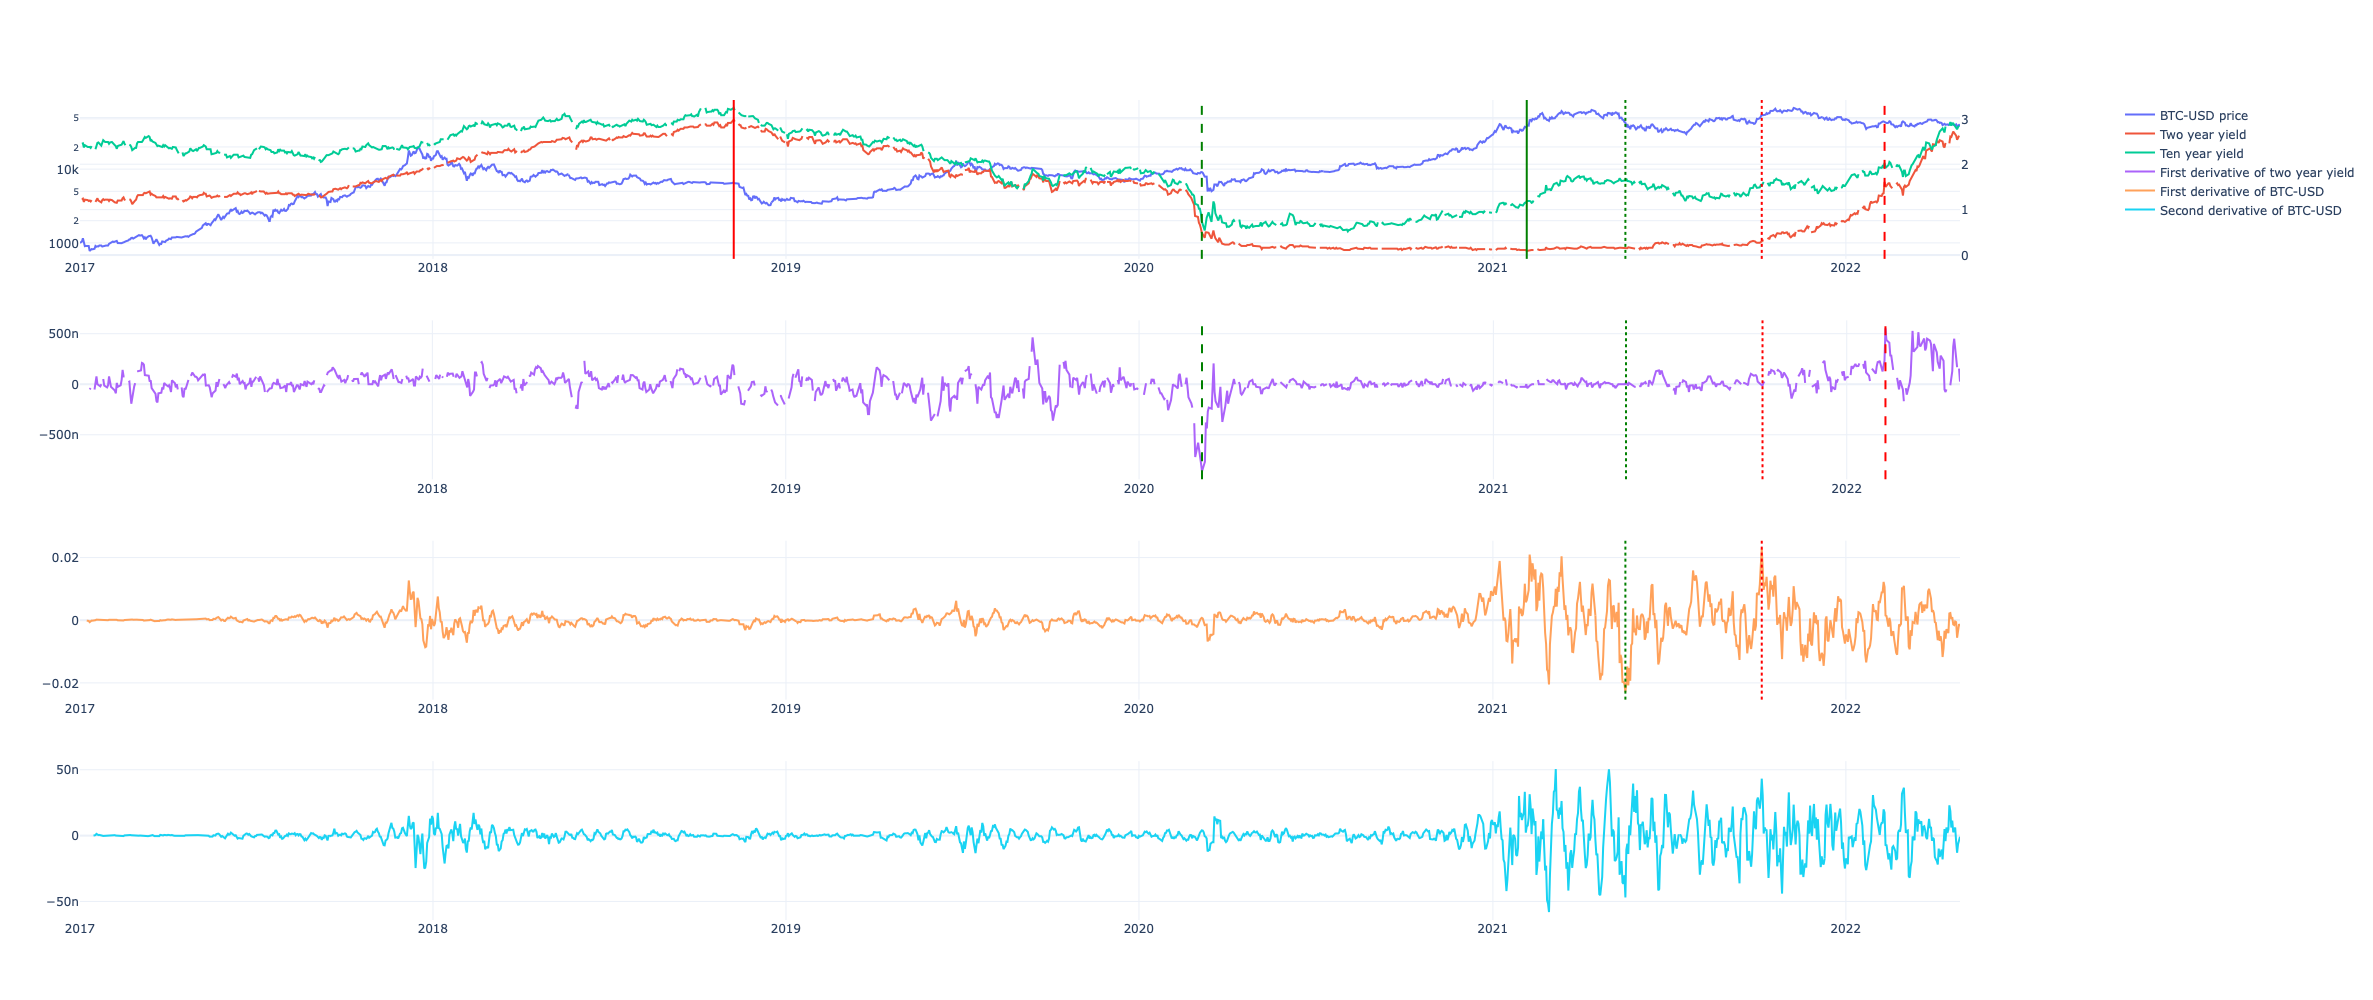

In [92]:
fig = make_subplots(rows=4, cols=1, specs=[[{"secondary_y": True}], [{"secondary_y": False}], [{"secondary_y": False}], [{"secondary_y": False}]])

fig.add_scatter(
    x=btc_data.index,
    y=btc_data["Adj Close"]["BTC-USD"],
    mode="lines",
    name="BTC-USD price",
    secondary_y=False,
    row=1, col=1
)

fig.add_scatter(
    x=df_rates.index,
    y=df_rates["RIFLGFCY02_N.B"],
    mode="lines",
    name="Two year yield",
    secondary_y=True,
    row=1, col=1
)

fig.add_scatter(
    x=df_rates.index,
    y=df_rates["RIFLGFCY10_N.B"],
    mode="lines",
    name="Ten year yield",
    secondary_y=True,
    row=1, col=1
)

fig.add_vline(
    df_rates["RIFLGFCY02_N.B"].idxmax(),
    line=dict(color="red"),
    row=1, col=1
)


fig.add_vline(
    df_rates["RIFLGFCY02_N.B"].idxmin(),
    line=dict(color="green"),
    row=1, col=1
)



fig.update_yaxes(
    type="log",
    secondary_y=False,
    row=1, col=1
)


first_deriv_rates = df_rates["RIFLGFCY02_N.B"].diff(periods=7) / df_rates.index.to_series().diff(periods=7).dt.total_seconds()
fig.add_scatter(
    x=df_rates.index,
    y=first_deriv_rates,
    name="First derivative of two year yield",
    row=2, col=1
)

fig.add_vline(
    first_deriv_rates.idxmin(),
    line=dict(color="green", dash="dash"),
    row="all", col=1
)

fig.add_vline(
    first_deriv_rates.idxmax(),
    line=dict(color="red", dash="dash"),
    row="all", col=1
)

first_deriv_price = btc_data["Adj Close"]["BTC-USD"].diff(periods=7) / btc_data.index.to_series().diff(periods=7).dt.total_seconds()
second_deriv_price = first_deriv_price.diff(periods=7) / first_deriv_price.index.to_series().diff(periods=7).dt.total_seconds()

fig.add_scatter(
    x=btc_data.index,
    y=first_deriv_price,
    name="First derivative of BTC-USD",
    row=3, col=1
)

fig.add_vline(
    first_deriv_price.idxmin(),
    line=dict(color="green", dash="dot"),
    row="all", col=1
)

fig.add_vline(
    first_deriv_price.idxmax(),
    line=dict(color="red", dash="dot"),
    row="all", col=1
)

fig.add_scatter(
    x=btc_data.index,
    y=second_deriv_price,
    name="Second derivative of BTC-USD",
    row=4, col=1
)


fig.update_layout(
    width=2000,
    height=1000,
    template="plotly_white",
)